# Getting started with the practicals

***These notebooks are best viewed in Jupyter. GitHub might not display all content of the notebook properly.***

## Goal of the practical exercises

The exercises have two goals:

1. Give you the opportunity to obtain 'hands-on' experience in implementing, training and evaluation machine learning models in Python. This experience will also help you better understand the theory covered during the lectures. 

2. Occasionally demonstrate some 'exam-style' questions that you can use as a reference when studying for the exam. Note however that the example questions are (as the name suggests) only examples and do not constitute a complete and sufficient list of 'things that you have to learn for the exam'. You can recognize example questions as (parts of) exercises by <font color="#770a0a">this font color</font>.

For each set of exercises (one Python notebook such as this one $==$ one set of exercises) you have to submit deliverables that will then be graded and constitute 25% of the final grade. Thus, the work that you do during the practicals has double contribution towards the final grade: as 25% direct contribution and as a preparation for the exam that will define the other 65% of the grade.

## Deliverables

For each set of exercises, you have to submit:
1. Python functions and/or classes (`.py` files) that implement basic functionalities (e.g. a $k$-NN classifier) and 
2. A *single* Python notebook that contains the experiments, visualization and answer to the questions and math problems. *Do not submit your answers as Word or PDF documents (they will not be graded)*. The submitted code and notebook should run without errors and be able to fully reproduce the reported results.

We recommend that you clone the provided notebooks (such as this one) and write your code in them. The following rubric will be used when grading the practical work:

Component  | Insufficient | Satisfactory | Excellent
--- | --- | --- | ---
**Code** | Missing or incomplete code structure, runs with errors, lacks documentation | Self-contained, does not result in errors, contains some documentation, can be easily used to reproduce the reported results | User-friendly, well-structured (good separation of general functionality and experiments, i.e. between `.py` files and the Pyhthon notebook), detailed documentation, optimized for speed, <s>use of a version control system (such as GitHub)</s>
**Answers to questions** | Incorrect, does not convey understanding of the material, appears to be copied from another source | Correct, conveys good understanding of the material, description in own words | Correct, conveys excellent level of understanding, makes connections between topics

## A word on notation

When we refer to Python variables, we will use a monospace font. For example, `X` is a Python variable that contains the data matrix. When we refer to mathematical variables, we will use the de-facto standard notation: $a$ or $\lambda$ is a scalar variable, $\boldsymbol{\mathrm{w}}$ is a vector and $\boldsymbol{\mathrm{X}}$ is a matrix (e.g. a data matrix from the example above). You should use the same notation when writing your answers and solutions.

# Two simple machine learning models

## Preliminaries

Throughout the practical curriculum of this course, we will use the Python programming language and its ecosystem of libraries for scientific computing (such as `numpy`, `scipy`, `matplotlib`, `scikit-learn` etc). The practicals for the deep learning part of the course will use the `keras` deep learning framework. If you are not sufficiently familiar with this programming language and/or the listed libraries and packages, you are strongly advised to go over the corresponding tutorials from the ['Essential skills'](https://github.com/tueimage/essential-skills) module (the `scikit-learn` library is not covered by the tutorial, however, an extensive documentation is available [here](https://scikit-learn.org/stable/documentation.html).

In this first set of exercises, we will use two toy datasets that ship together with `scikit-learn`. 

The first dataset is named `diabetes` and contains 442 patients described with 10 features: age, sex, body mass index, average blood pressure, and six blood serum measurements. The target variable is a continuous quantitative measure of the disease (diabetes) progression one year after the baseline measurements were recorded. More information is available [here](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/descr/diabetes.rst) and [here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

The second dataset is named `breast_cancer` and is a copy of the UCI ML Breast Cancer Wisconsin (Diagnostic) datasets (more infortmation is available [here](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/descr/breast_cancer.rst) and [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). The datasets contains of 569 instances represented with 30 features that are computed from a images of a fine needle aspirate of a breast mass. The features describe characteristics of the cell nuclei present in the image. Each instance is associated with a binary target variable ('malignant' or 'benign'). 

You can load the two datasets in the following way:

In [7]:
import numpy as np
from sklearn.datasets import load_diabetes, load_breast_cancer

diabetes = load_diabetes()

breast_cancer = load_breast_cancer()

In the majority of the exercises in this course, we will use higher-level libraries and packages such as `scikit-learn` and `keras` to implement, train and evaluate machine learning models. However, the goal of this first set of exercises is to illustrate basic mathematical tools and machine learning concepts. Because of this, we will impose a restriction of only using basic `numpy` functionality. Furthermore, you should as much as possible restrict the use of for-loops (e.g. use a vector-to-matrix product instead of a for loop when appropriate).

If `X` is a 2D data matrix, we will use the convention that the rows of the matrix contain the samples (or instances) and the columns contain the features (inputs to the model). That means that a data matrix with a shape `(122, 13)` represents a dataset with 122 samples, each represented with 13 features. Similarly, if `Y` is a 2D matrix containing the targets, the rows correspond to the samples and the columns to the different targets (outputs of the model). Thus, if the shape of `Y` is `(122, 3)` that means that there are 122 samples and each sample is has 3 targets (note that in the majority of the examples we will only have a single target and thus the number of columns of `Y` will be 1).

You can obtain the data and target matrices from the two datasets in the following way:

In [8]:
X = diabetes.data
Y = diabetes.target[:, np.newaxis]

print(X.shape)
print(Y.shape)

(442, 10)
(442, 1)


In [25]:
diabetes.data[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

If you want to only use a subset of the available features, you can obtain a reduced data matrix in the following way:

In [9]:
# use only the fourth feature
X = diabetes.data[:, np.newaxis, 3]
print(X.shape)

# use the third, and tenth features
X = diabetes.data[:, (3,9)]
print(X.shape)

(442, 1)
(442, 2)


***Question***: Why we need to use the `np.newaxis` expression in the examples above? 

**Answer:** If we didn't use the `np.newaxis` expression, the data and target matrices wouldn't have a second dimension, they would be 1D arrays. The `np.newaxis` expression increases the dimension of the existing array by one more dimension, so 1D arrays will become 2D arrays, 2D arrays will become 3D arrays, and so on. It's important and useful to reshape the data from 1D arrays to 2D arrays because 1D arrays often lead to ambiguous results as they do not behave as row/column vectors. For instance, applying the `transpose()` function to 1D arrays doesn't change the shape of the array. Therefore, we need to add another dimension in order to be able to perform operations on the matrices.

Note that in all your experiments in the exercises, you should use and independent training and testing sets. You can split the dataset into a training and testing subsets in the following way:

In [10]:
# use the fourth feature
# use the first 300 training samples for training, and the rest for testing
X_train = diabetes.data[:300, np.newaxis, 3]
y_train = diabetes.target[:300, np.newaxis]
X_test = diabetes.data[300:, np.newaxis, 3]
y_test = diabetes.target[300:, np.newaxis]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(300, 1)
(300, 1)
(142, 1)
(142, 1)


## Exercises

### Linear regression

Implement training and evaluation of a linear regression model on the diabetes dataset using only matrix multiplication, inversion and transpose operations. Report the mean squared error of the model.

To get you started we have implemented the first part of this exercise (fitting of the model) as an example.

In [11]:
# add subfolder that contains all the function implementations
# to the system path so we can import them
import sys
sys.path.append('code/')

# the actual implementation is in linear_regression.py,
# here we will just use it to fit a model
from linear_regression import *

# load the dataset
# same as before, but now we use all features
X_train = diabetes.data[:300, :]
y_train = diabetes.target[:300, np.newaxis]
X_test = diabetes.data[300:, :]
y_lest = diabetes.target[300:, np.newaxis]

# Run the linear regression model with the training sets
beta = lsq(X_train, y_train)

# Evaluate the model with the test sets by calculating the mean squared error
epsilon = mse(X_test, y_test, beta)

# print the parameters
print('The model parameters are: \n {} \n'.format(beta))
print('Mean squared error = {}'.format(epsilon))

The model parameters are: 
 [[ 152.34786452]
 [ -16.57607993]
 [-254.66532396]
 [ 560.98630022]
 [ 278.91811152]
 [-393.41357305]
 [  97.05460405]
 [ -19.0023093 ]
 [ 169.46450327]
 [ 632.95050374]
 [ 114.21638941]] 

Mean squared error = 2794.5690145007284


### Weighted linear regression

Assume that in the dataset that you use to train a linear regression model, there are identical versions of some samples. This problem can be reformulated to a weighted linear regression problem where the matrices $\boldsymbol{\mathrm{X}}$ and $\boldsymbol{\mathrm{Y}}$ (or the vector $\boldsymbol{\mathrm{y}}$ if there is only a single target/output variable) contain only the unique data samples, and a vector $\boldsymbol{\mathrm{d}}$ is introduced that gives more weight to samples that appear multiple times in the original dataset (for example, the sample that appears 3 times has a corresponding weight of 3). 

<p><font color='#770a0a'>Derive the expression for the least-squares solution of a weighted linear regression model (note that in addition to the matrices $\boldsymbol{\mathrm{X}}$ and $\boldsymbol{\mathrm{Y}}$, the solution should include a vector of weights $\boldsymbol{\mathrm{d}}$).</font></p>

We need to find coefficients $\hat{w_{i}}$ which minimize the error estimated with the weighted sum of squares
\begin{align}
WSS(\boldsymbol{\mathrm{w}},\boldsymbol{\mathrm{d}}) = \sum_{i=1}^{N}d_{i}(y_{i}-\boldsymbol{\mathrm{x}}_{i}^{T}\boldsymbol{\mathrm{w}})^2
\end{align}

We look for the solution $\boldsymbol{\mathrm{\hat{w}}}$ using the matrix notation
\begin{align}
WSS(\boldsymbol{\mathrm{w}},\boldsymbol{\mathrm{d}}) = (\boldsymbol{\mathrm{Y}}-\boldsymbol{\mathrm{X}}\boldsymbol{\mathrm{w}})^{T}\boldsymbol{\mathrm{d}}(\boldsymbol{\mathrm{Y}}-\boldsymbol{\mathrm{X}}\boldsymbol{\mathrm{w}})
\end{align}


To find the minimum we differentiate with respect to $\boldsymbol{\mathrm{w}}$ which gives
\begin{align}
-2\boldsymbol{\mathrm{X}}^{T}\boldsymbol{\mathrm{d}}(\boldsymbol{\mathrm{Y}}-\boldsymbol{\mathrm{X}}\boldsymbol{\mathrm{w}})
\end{align}

To find the minimum our derivative must be $\boldsymbol{\mathrm{0}}$, so
\begin{align} 
\boldsymbol{\mathrm{X}}^{T}\boldsymbol{\mathrm{d}}(\boldsymbol{\mathrm{Y}}-\boldsymbol{\mathrm{X}}\boldsymbol{\mathrm{w}})=\boldsymbol{\mathrm{0}} 
\end{align} 

\begin{align} 
\boldsymbol{\mathrm{X}}^{T}\boldsymbol{\mathrm{d}}\boldsymbol{\mathrm{Y}} - \boldsymbol{\mathrm{X}}^{T}\boldsymbol{\mathrm{d}}\boldsymbol{\mathrm{X}}\boldsymbol{\mathrm{w}} = \boldsymbol{\mathrm{0}}
\end{align}

\begin{align}
\boldsymbol{\mathrm{X}}^{T}\boldsymbol{\mathrm{d}}\boldsymbol{\mathrm{Y}} = \boldsymbol{\mathrm{X}}^{T}\boldsymbol{\mathrm{d}}\boldsymbol{\mathrm{X}}\boldsymbol{\mathrm{w}}
\end{align} 

So if $\boldsymbol{\mathrm{X}}^{T}\boldsymbol{\mathrm{d}}\boldsymbol{\mathrm{X}}$ is non-singular, the unique least-squares solution of the weighted linear regression model is given by 
\begin{align}
\hat{\boldsymbol{\mathrm{w}}} = (\boldsymbol{\mathrm{X}}^{T}\boldsymbol{\mathrm{d}}\boldsymbol{\mathrm{X}})^{-1}\boldsymbol{\mathrm{X}}^{T}\boldsymbol{\mathrm{d}}\boldsymbol{\mathrm{Y}}
\end{align} 

### $k$-NN classification

Implement a $k$-Nearest neighbors classifier from scratch in Python using only basic matrix operations with `numpy` and `scipy`. Train and evaluate the classifier on the breast cancer dataset, using all features. Show the performance of the classifier for different values of $k$ (plot the results in a graph). Note that for optimal results, you should normalize the features (e.g. to the $[0, 1]$ range or to have a zero mean and unit standard deviation).

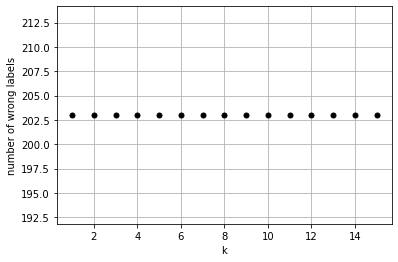

In [4]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing
from week_1 import kNearestNeighbour
import matplotlib.pyplot as plt

# load data 
breastCancer = load_breast_cancer()
X = preprocessing.normalize(breastCancer.data)  
Y = breastCancer.target

# divide data into training and testing set
nrTrain = 300

Xtrain = X[:nrTrain, np.newaxis, :] 
Ytrain = Y[:nrTrain, np.newaxis]

Xtest = X[nrTrain:, np.newaxis, :]
Ytest = Y[nrTrain:, np.newaxis] 

# compute new labels using nearest neighbours and label errors
errors = []
ks = range(1, 16)
for k in ks:
    labelsFound = kNearestNeighbour(k, Xtest, Xtrain, Ytrain)
    err = np.sum(labelsFound != Ytest)
    errors.append(err)

# plot error vs k    
plt.plot(ks, errors, 'k.', markersize=10)
plt.xlabel('k')
plt.ylabel('number of wrong labels')
plt.grid('on')


### $k$-NN regression

Modify the $k$-NN implementation to do regression instead of classification. Compare the performance of the linear regression model and the $k$-NN regression model on the diabetes dataset for different values of $k$..

### Class-conditional probability

Compute and visualize the class-conditional probability (conditional probability where the class label is the conditional variable, i.e. $P(X = x \mid Y = y_i)$ for all features in the breast cancer dataset. Assume a Gaussian distribution.

<p><font color='#770a0a'>Based on visual analysis of the plots, which individual feature can best discriminate between the two classes? Motivate your answer.</font></p>



Given an input feature vector $X = (X_1, X_2, … ,X_N)$ with N attributes, the optimal binary prediction on its class Y is made by $arg \underset{y \: \in {\: 0, 1}}{\mathrm{max}} P(Y|X)$.

The formula for Bayes' Theorem is $P(Y|X) = \frac{P(Y) P(X|Y)}{P(X)}$, where $P(X|Y)$ is the class-conditional distribution for class y, and $P(Y)$ is the prior distribution. We’re only interested in the y value that gives us the highest probability, so $P(X)$ can be dropped from the equation: $arg \underset{y \: \in {\: 0, 1}}{\mathrm{max}} P(Y|X) =$ $arg \underset{y \: \in {\: 0, 1}}{\mathrm{max}} P(X|Y) P(Y)$. As the class-conditional distribution is continuous, this is equal to $arg \underset{y \: \in {\: 0, 1}}{\mathrm{max}} p(X|Y) P(Y)$ (where $p(X|Y)$ is the probability density).

In this exercise, we have a Gaussian distribution. Therefore, in order to calculate $p(X|Y)$, we have to determine two parameters: $\mu$ and $\sigma^2$. The maximum likelihood estimators of the mean and the variance are: $\hat \mu_n = \frac{1}{n} \sum_{j = 1}^{n} x_j$ and $\hat \sigma^2_n = \frac{1}{n} \sum_{j = 1}^{n} (x_j - \hat \mu)^2$. 

In [ ]:
from sklearn.datasets import load_breast_cancer
import sys
sys.path.append('code/')
import numpy as np
import matplotlib.pyplot as plt
from math import *
from prob_density_function import *

# load dataset
breast_cancer = load_breast_cancer()

X = breast_cancer.data # data matrix
y = breast_cancer.target # classification target, 0 or 1
#y_col = breast_cancer.target[:, np.newaxis] 

# normalize each column (parameter)
X_normed = X / X.max(axis=0)

# sort data into classes (normalized)
XN0 = X_normed[y == 0] #malignant 
XN1 = X_normed[y == 1] #benign

# sort data into classes (not normalized)
X0 = X[y == 0] #malignant 
X1 = X[y == 1] #benign

# probability of each class
P0 = len(X0)/(len(X0) + len(X1))
P1 = 1 - P0

# estimate mean and standard deviation for each parameter and class (normalized)
meanN0 = np.mean(XN0, axis = 0)
meanN1 = np.mean(XN1, axis = 0)
sdN0 = np.std(XN0, axis = 0)
sdN1 = np.std(XN1, axis = 0)

# estimate mean and standard deviation for each parameter and class (not normalized)
mean0 = np.mean(X0, axis = 0)
mean1 = np.mean(X1, axis = 0)
sd0 = np.std(X0, axis = 0)
sd1 = np.std(X1, axis = 0)

#Axes are defined for arrays with more than one dimension. 
#A 2-dimensional array has two axes: the first axis 0 (direction along the rows) and axis 1 (direction along the columns)

# Prior probabilities
P_y0 = len(XN0)/(len(XN0)+len(XN1)) # P(Y = 0)
P_y1 = 1 - P_y0 # P(Y = 1)

# Plots
fig1, axs1 = plt.subplots(10, 3, figsize=(20,40), constrained_layout = True) # create 10x3 subplots
fig1.suptitle('Probability Density Functions', fontsize = 30) # displaying the title

fig2, axs2 = plt.subplots(10, 3, figsize=(20,40), constrained_layout = True) # create 10x3 subplots
fig2.suptitle('Class Conditional Probabilities', fontsize = 30) # displaying the title

f = 0 # feature number (between 0 and 29, as there are 30 features)
for i in range(10):
    for j in range(3):
       
        # [PLOT 1] Set suitable x_axis values for each subplot using the three-sigma rule
        # Three-sigma rule: statistical rule that predicts that 99.7% of observations falls
        #within the first three standard deviations: (mean-3sd, mean+3sd)
        Xmin1 = min(meanN0[f] - 3 * sdN0[f], meanN1[f] - 3 * sdN1[f])
        Xmax1 = max(meanN0[f] + 3 * sdN0[f], meanN1[f] + 3 * sdN1[f])
        Xaxis1 = np.linspace(Xmin1, Xmax1, 200)
        
        # [PLOT 2] Set suitable x_axis values for each subplot
        Xmin2 = min(min(X0[:, f]), min(X1[:, f]))
        Xmax2 = max(max(X0[:, f]), max(X1[:, f]))
        Xaxis2 = np.linspace(Xmin2, Xmax2, 200)
        
        # [PLOT 1] Probability density functions (pdf) NORMALIZED
        # The function "normal_pdf" is implemented in the file "prob_density_function.py", folder "code" 
        pdfN0 = normal_pdf(Xaxis1, meanN0[f], sdN0[f]) # P(X=xi | Y=0)     
        pdfN1 = normal_pdf(Xaxis1, meanN1[f], sdN1[f]) # P(X=xi | Y=1)
        
        # [PLOT 2] Probability density functions (pdf) NOT NORMALIZED
        pdf0 = normal_pdf(Xaxis2, mean0[f], sd0[f]) # p(y=yi | X=0)     
        pdf1 = normal_pdf(Xaxis2, mean1[f], sd1[f]) # p(y=yi | X=1)
        
        # [PLOT 2] CLASS CONDITIONAL PROBABILITIES -> Bayes's Rule
        # P(X=0 | y=y_f) = p(y=y_f | X=0)*P(X=0) /(p(y=y_f | X=0)*P(X=0) + p(y=y_f | X=1)*P(X=1))
        CP0 = pdf0 * P_y0 / (pdf0 * P_y0 + pdf1 * P_y1)
        CP1 = pdf1 * P_y1 / (pdf0 * P_y0 + pdf1 * P_y1)
        
        # Plots generation
        axs1[i, j].plot(Xaxis1, pdfN0, color = 'red', label = "Malignant")
        axs1[i, j].fill_between(Xaxis1, pdfN0, step="pre", alpha=0.3, color = 'red')
        axs1[i, j].plot(Xaxis1, pdfN1, color = 'blue', label = "Benign")
        axs1[i, j].fill_between(Xaxis1, pdfN1, step="pre", alpha=0.3, color = 'blue')
        
        axs2[i, j].plot(Xaxis2, CP0, color = 'red', label = "Malignant")
        axs2[i, j].fill_between(Xaxis2, CP0, step="pre", alpha=0.3, color = 'red')
        axs2[i, j].plot(Xaxis2, CP1, color = 'blue', label = "Benign")
        axs2[i, j].fill_between(Xaxis2, CP1, step="pre", alpha=0.3, color = 'blue')
        
        # To estimate which feature has the lowest overlap area, uncomment the following two lines:
        ### axs1[i, j].set_ylim([0, 5]) # define the same limits to both axes in order to visually compare the features
        ### axs1[i, j].set_xlim([0,1])
        
        # Legend and subtitles
        axs1[i, j].legend(loc = 'upper right', prop={'size': 15}) # size of the legend box  
        axs1[i, j].set_title('Feature ' + str(f+1), fontsize = 20) # title of each subplot
        
        axs2[i, j].legend(loc = 'upper right', prop={'size': 15}) # size of the legend box  
        axs2[i, j].set_title('Feature ' + str(f+1), fontsize = 20) # title of each subplot
        
        f += 1

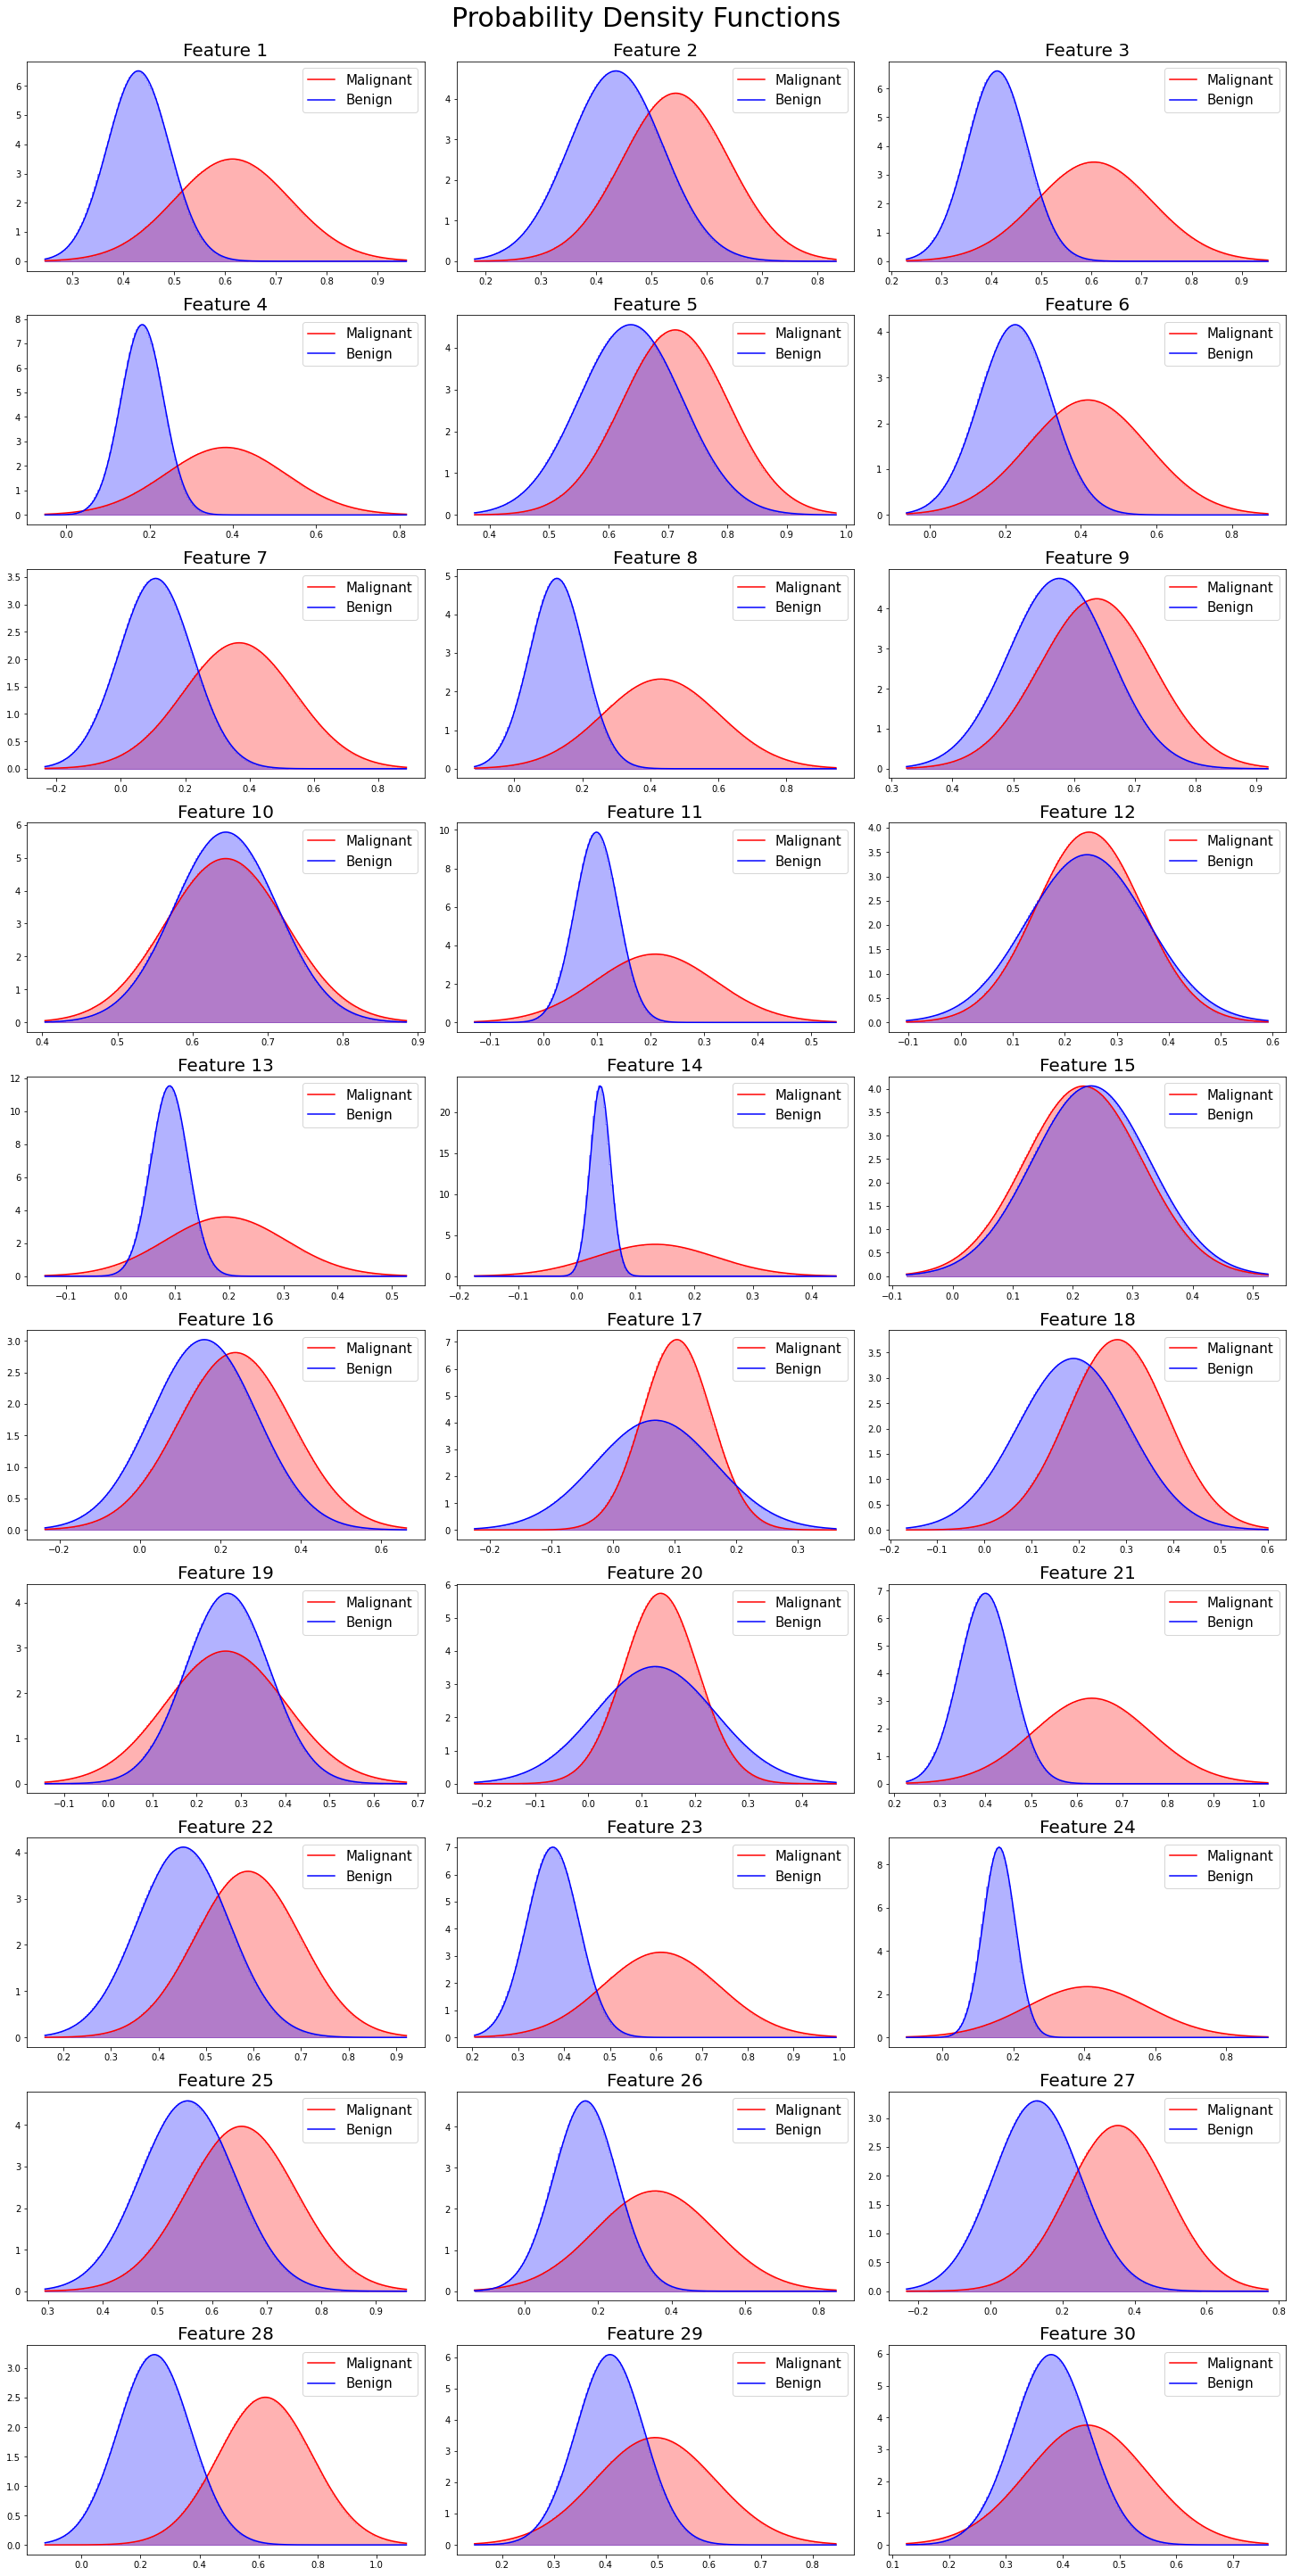

In [13]:
from sklearn.datasets import load_breast_cancer
import sys
sys.path.append('code/')
import numpy as np
import matplotlib.pyplot as plt
from math import *
from prob_density_function import *

# load dataset
breast_cancer = load_breast_cancer()

X = breast_cancer.data # data matrix
y = breast_cancer.target # classification target, 0 or 1
#y_col = breast_cancer.target[:, np.newaxis] 

# use the first 400 training samples for training, and the rest for testing
X_training = X[:400]
y_training = y[:400]
X_test = X[400:]
y_test = y[400:]

# normalize each column (parameter)
X_normed = X_training / X_training.max(axis=0)

# sort data into classes (normalized)
XN0 = X_normed[y_training == 0] #malignant 
XN1 = X_normed[y_training == 1] #benign

# sort data into classes (not normalized)
X0 = X_training[y_training == 0] #malignant 
X1 = X_training[y_training == 1] #benign

# estimate mean and standard deviation for each parameter and class (normalized)
meanN0 = np.mean(XN0, axis = 0)
meanN1 = np.mean(XN1, axis = 0)
sdN0 = np.std(XN0, axis = 0)
sdN1 = np.std(XN1, axis = 0)

# estimate mean and standard deviation for each parameter and class (not normalized)
mean0 = np.mean(X0, axis = 0)
mean1 = np.mean(X1, axis = 0)
sd0 = np.std(X0, axis = 0)
sd1 = np.std(X1, axis = 0)

#Axes are defined for arrays with more than one dimension. 
#A 2-dimensional array has two axes: the first axis 0 (direction along the rows) and axis 1 (direction along the columns)

# Prior probabilities
P_y0 = len(XN0)/(len(XN0)+len(XN1)) # P(Y = 0)
P_y1 = 1 - P_y0 # P(Y = 1)

# Plots
fig1, axs1 = plt.subplots(10, 3, figsize=(20,40), constrained_layout = True) # create 10x3 subplots
fig1.suptitle('Probability Density Functions', fontsize = 30) # displaying the title

f = 0 # feature number (between 0 and 29, as there are 30 features)
for i in range(10):
    for j in range(3):
       
        # Set suitable x_axis values for each subplot using the three-sigma rule
        # Three-sigma rule: statistical rule that predicts that 99.7% of observations falls
        #within the first three standard deviations: (mean-3sd, mean+3sd)
        Xmin1 = min(meanN0[f] - 3 * sdN0[f], meanN1[f] - 3 * sdN1[f])
        Xmax1 = max(meanN0[f] + 3 * sdN0[f], meanN1[f] + 3 * sdN1[f])
        Xaxis1 = np.linspace(Xmin1, Xmax1, 200)
        
        # Probability density functions (pdf) NORMALIZED
        pdfN0 = normal_pdf(Xaxis1, meanN0[f], sdN0[f]) # P(X=xi | Y=0)     
        pdfN1 = normal_pdf(Xaxis1, meanN1[f], sdN1[f]) # P(X=xi | Y=1)
        
        # Plots generation
        axs1[i, j].plot(Xaxis1, pdfN0, color = 'red', label = "Malignant")
        axs1[i, j].fill_between(Xaxis1, pdfN0, step="pre", alpha=0.3, color = 'red')
        axs1[i, j].plot(Xaxis1, pdfN1, color = 'blue', label = "Benign")
        axs1[i, j].fill_between(Xaxis1, pdfN1, step="pre", alpha=0.3, color = 'blue')
        
        # To estimate which feature has the lowest overlap area, uncomment the following two lines:
        ### axs1[i, j].set_ylim([0, 5]) # define the same limits to both axes in order to visually compare the features
        ### axs1[i, j].set_xlim([0,1])
        
        # Legend and subtitles
        axs1[i, j].legend(loc = 'upper right', prop={'size': 15}) # size of the legend box  
        axs1[i, j].set_title('Feature ' + str(f+1), fontsize = 20) # title of each subplot
        
        f += 1

In [14]:
# Classify an example

def classify(X_values):
    if np.prod(normal_pdf(X_values, mean0, sd0)) * P_y0 > np.prod(normal_pdf(X_values, mean1, sd1)) * P_y1:
        return 0
    else:
        return 1
    
# Example: first patient of testing dataset
prediction = classify(X_test[0])
true_classification = y_test[0]
print("The classification predicted is " + str(prediction) + ". The true classification is " + str(true_classification) +
      ".")

# Example: last patient of testing dataset
prediction = classify(X_test[-1])
true_classification = y_test[-1]
print("The classification predicted is " + str(prediction) + ". The true classification is " + str(true_classification) +
      ".")

The classification predicted is 0. The true classification is 0.
The classification predicted is 1. The true classification is 1.


The overlap area of two probability density functions (pdf) can be used to estimate the degree of similarity (or diference) between the two populations described by some type of distribution. Intuitively, when two populations are similar, their density functions overlap.

In the first figure, two normally distributed populations (classification of 0 or 1) are represented for each feature, and there's in all of them some degree of overlap. To find out which individual feature best discriminates between the two classes, we can calculate the overlap area, because low overlap means that observing the value of that feature will be very informative about which distribution the sample came from.

To visually determine the best feature, we need to set the same axis limits (both horizontally and vertically) for every subplot. Having that done, the best features are the  8𝑡ℎ , the  23𝑟𝑑 , the  24𝑡ℎ  and the  28𝑡ℎ . In addition, a low overlap often means a high mean difference (if we normalize the data for each feature). Thus, if we had to choose the best feature based on only the plots, we would opt for the  28𝑡ℎ .

To determine the best feature more objectively, we should calculate the overlap area - for example, with the overlap() method of statistics.NormalDist().